## Bernstein-Vazirani Algorithm

In [1]:
from qiskit import *
%matplotlib inline
from qiskit.tools.visualization import plot_histogram

In [2]:
secretnumber = '111000'

In [3]:
circuit = QuantumCircuit(len(secretnumber)+1,6)

In [4]:
#circuit.h([0,1,2,3,4,5])
circuit.h(range(len(secretnumber)))
circuit.x(len(secretnumber))
circuit.h(len(secretnumber))

circuit.barrier()


for ii, yesno in enumerate(reversed(secretnumber)):
    if yesno ==  '1':
        circuit.cx(ii, len(secretnumber))

#circuit.cx(5,6)
#circuit.cx(3,6)
#circuit.cx(0,6)

circuit.barrier()
#circuit.h([0,1,2,3,4,5])
circuit.h(range(len(secretnumber)))
circuit.barrier()
circuit.measure(range(len(secretnumber)),range(len(secretnumber)))

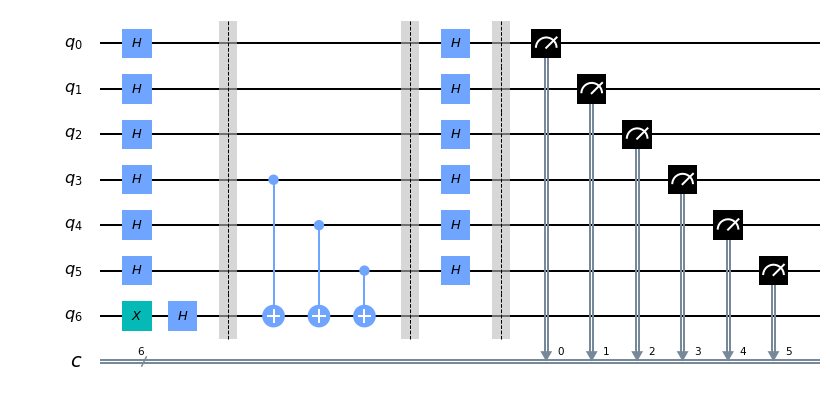

In [5]:
circuit.draw(output='mpl')

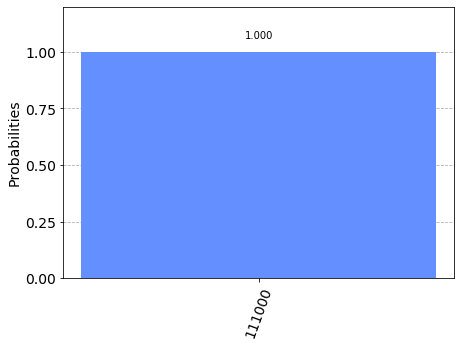

In [6]:
simulator = Aer.get_backend('qasm_simulator')
result=execute(circuit, backend=simulator,shots=1).result()
counts = result.get_counts()
from qiskit.tools.visualization import plot_histogram
plot_histogram(counts)

In [8]:
print('Secret',counts)

Secret {'111000': 1}
